In [1]:
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

sns.set(style="ticks")
sns.set_style('whitegrid')
sns.set_color_codes()

In [2]:
%matplotlib inline
#from preamble import *
import numpy as np
import math
import pandas as pd
import numpy as np
from collections import Counter
import pickle
from tqdm import tqdm_notebook

import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

In [3]:
#with open('data/pickle/SMPM.pkl', 'rb') as f:
    #SMPM_proba = pickle.load(f)classification_report
#SMPM_proba = pd.DataFrame(SMPM_proba, columns =['Wproba','Dproba','Lproba'])

fname = 'data/prediction_data.csv'
data = pd.read_csv(fname)
#data = pd.concat([data, SMPM_proba], axis=1)
#data = data[(data['Season'] < 1819) & ( data['League'] != 'BUNDES')]
data = data[(data['Season'] < 1819)]

In [4]:
def transformResult(row):
    if(row['Result'] == 'H'):
        return 0
    elif(row['Result'] == 'A'):
        return 2
    else:
        return 1

data["Result"] = data.apply(lambda row: transformResult(row),axis=1)

X_train = data[data['Season'] < 1718].reset_index(drop=True)
X_test = data[data['Season'] == 1718].reset_index(drop=True)
#X_train = data[data['Season'] < 1617].reset_index(drop=True)
#X_test = data[data['Season'] >= 1617].reset_index(drop=True)

Y_train = X_train['Result']
Y_test = X_test['Result']
X_train = X_train.iloc[:, 9:]
X_test = X_test.iloc[:, 9:]

train_proba, test_proba = X_train.iloc[:, -3:].values, X_test.iloc[:, -3:].values
X_train, X_test = X_train.iloc[:, :-3], X_test.iloc[:, :-3]

In [5]:
data["Result"] = data.apply(lambda row: transformResult(row),axis=1)

X_train = data[data['Season'] < 1718].reset_index(drop=True)
X_test = data[(data['Season'] == 1718) & (data['League'] != 'BUNDES')].reset_index(drop=True)
X_test_LALIGA = data[(data['Season'] == 1718) & (data['League'] == 'LALIGA')].reset_index(drop=True)
X_test_EPL = data[(data['Season'] == 1718) & (data['League'] == 'EPL')].reset_index(drop=True)
X_test_SERIE = data[(data['Season'] == 1718) & (data['League'] == 'SERIE')].reset_index(drop=True)
X_test_BUNDES = data[(data['Season'] == 1718) & (data['League'] == 'BUNDES')].reset_index(drop=True)

Y_train = X_train['Result']
Y_test = X_test['Result']
Y_test_LALIGA = X_test_LALIGA['Result']
Y_test_EPL = X_test_EPL['Result']
Y_test_SERIE = X_test_SERIE['Result']
Y_test_BUNDES = X_test_BUNDES['Result']
X_train = X_train.iloc[:, 9:]
X_test = X_test.iloc[:, 9:]
X_test_LALIGA = X_test_LALIGA.iloc[:, 9:]
X_test_EPL = X_test_EPL.iloc[:, 9:]
X_test_SERIE = X_test_SERIE.iloc[:, 9:]
X_test_BUNDES = X_test_BUNDES.iloc[:, 9:]

In [6]:
#from sklearn.preprocessing import MinMaxScaler

#min_max_scaler = MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.fit_transform(X_test)

In [7]:
#from sklearn import preprocessing
#X_train = preprocessing.normalize(X_train, norm='l2')
#X_test_LALIGA = preprocessing.normalize(X_test_LALIGA, norm='l2')
#X_test_EPL = preprocessing.normalize(X_test_EPL, norm='l2')
#X_test_SERIE = preprocessing.normalize(X_test_SERIE, norm='l2')
#X_test_BUNDES = preprocessing.normalize(X_test_BUNDES, norm='l2')
#X_test = preprocessing.normalize(X_test, norm='l2')

In [8]:
from imblearn.over_sampling import SMOTE
X_train_, Y_train_ = SMOTE(kind='borderline2', k_neighbors=20, ratio=1).fit_sample(X_train, Y_train)
print('Number of train data {} -> {}'.format(len(X_train), len(X_train_)))
X_train, Y_train = X_train_, Y_train_
X_test = np.array(X_test)
X_test_LALIGA = np.array(X_test_LALIGA)
X_test_EPL = np.array(X_test_EPL)
X_test_SERIE = np.array(X_test_SERIE)
X_test_BUNDES = np.array(X_test_BUNDES)

Y_test = np.array(Y_test)
Y_test_LALIGA = np.array(Y_test_LALIGA)
Y_test_EPL = np.array(Y_test_EPL)
Y_test_EPL = np.array(Y_test_EPL)
Y_test_EPL = np.array(Y_test_EPL)

C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Number of train data 10111 -> 14093


In [9]:
from collections import Counter
Counter(Y_train)

Counter({0: 4698, 1: 4697, 2: 4698})

In [10]:
def adding_data(X_train, Y_train, ratio=0.25, WDL=1):
    import random

    dataindex = [idx for idx, i in enumerate(Y_train) if i ==WDL]
    random.shuffle(dataindex)
    
    noda = int(len(dataindex) * ratio)
    dataindex = dataindex[:noda]
    
    extraY = [WDL for i in range(noda)]
    extraY = np.array(extraY)
    
    for idx, i in enumerate(dataindex):
        if idx == 0:
            holder = X_train[i]
        else:
            holder = np.vstack([holder, X_train[i]])
    X_train = np.vstack([X_train, holder])
    Y_train = np.hstack([Y_train, extraY])
    
    return X_train, Y_train

In [11]:
#X_train, Y_train = adding_data(X_train, Y_train, ratio=0.3, WDL=1)

In [12]:
#X_train, Y_train = adding_data(X_train, Y_train, ratio=0.1, WDL=2)

In [13]:
Counter(Y_train)

Counter({0: 4698, 1: 4697, 2: 4698})

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix

In [14]:
ps = False

In [ ]:
if ps == True:
    #KNN
    plot_scores_knn = []
    for b in range(1,50):
        clf_knn = KNeighborsClassifier(n_neighbors=b)
        clf_knn.fit(X_train,Y_train)
        scores = accuracy_score(Y_test,clf_knn.predict(X_test))
        plot_scores_knn.append(scores)

    #XGBClassifier
    plot_scores_XGB = []
    for i in range(1,100):
        clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
        clf_XGB.fit(X_train, Y_train)
        scores = accuracy_score(Y_test,clf_XGB.predict(X_test))
        plot_scores_XGB.append(scores)

    #Logistic Regression
    plot_scores_logreg= []
    cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
    for c in cs:
        clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
        clf_logreg.fit(X_train, Y_train)
        scores = accuracy_score(Y_test,clf_logreg.predict(X_test))
        plot_scores_logreg.append(scores)

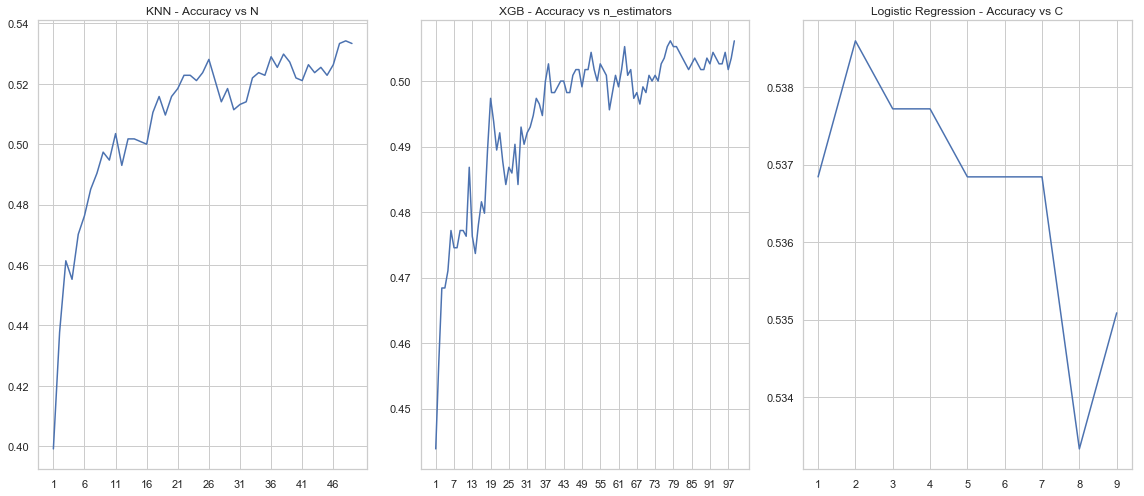

In [130]:
if ps == True:
    fig = plt.figure(figsize = (16,7))
    # plt.style.use('ggplot')

    ax1 = fig.add_subplot(1,3,1)
    ax1.plot(range(1,50),plot_scores_knn);
    ax1.set_title("KNN - Accuracy vs N")
    ax1.set_xticks(range(1,50,5));

    ax2 = fig.add_subplot(1,3,2)
    ax2.plot(range(1,100),plot_scores_XGB);
    ax2.set_xticks(range(1,100,6));
    ax2.set_title("XGB - Accuracy vs n_estimators")

    ax3 = fig.add_subplot(1,3,3)
    ax3.plot(range(1,10),plot_scores_logreg);
    ax3.set_xticks(range(1,10));
    ax3.set_title("Logistic Regression - Accuracy vs C")

    fig.tight_layout()

In [353]:
#X_train = X_train[['odds_l', 'odds_d', 'odds_w']]
#X_test = X_test[['odds_l', 'odds_d', 'odds_w']]

In [15]:
def prediction(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    kfold = KFold(n_splits=10, shuffle=True, random_state = 0)

    scores = cross_val_score(model, X_test, Y_test, cv= kfold)
    print("Training accuracy: {:.5f}".format(model.score(X_train, Y_train)))
    print("Test accuracy: {:.5f}".format(model.score(X_test, Y_test)))
    print("Cross-validation mean score : {:.5f}".format(scores.mean()))
    print("Cross-validation scores : {}".format(scores))


    predict = model.predict(X_test)
    print(classification_report(predict, Y_test), '\n')

    cm = pd.DataFrame(confusion_matrix(predict, Y_test), columns=['H','D','A'], index=['H','D','A'])
    sns.heatmap(cm, annot=True, fmt="d")

In [16]:
LogReg = LogisticRegression(C=3,solver='lbfgs',multi_class='ovr')
KNN = KNeighborsClassifier(n_neighbors=48)
LSVC = LinearSVC()
RF = RandomForestClassifier()
MultiNB = MultinomialNB()
"""
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='merror', gamma=0.5,
       learning_rate=0.01, max_delta_step=1, max_depth=6,
       min_child_weight=0.1, missing=None, n_estimators=100, n_jobs=1,
       nthread=20, objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)"""
xgb = XGBClassifier(max_depth=6, nthread=20, objective='multi:softprob', learning_rate=0.01, gamma=15, colsample_bytree=0.8, 
                scale_pos_weight=1, max_delta_step=1, subsample=1, eval_metric='merror', min_child_weight=0.1)

models = [LogReg, KNN, LSVC, RF, MultiNB, xgb]
model_name = ['Logistic Regression', 'K-Neighbors Classifier', 'Linear SVC', 'Random Forest Classifier', 'Multi nomial Naive Bayes', 'XGB Classifier']

In [ ]:
savemodel = False

In [20]:
if savemodel == True:
    with open('data/pickle/xgb.pkl', 'wb') as f:
        pickle.dump(xgb, f)

In [21]:
loadmodel = False

In [22]:
if loadmodel == True:
    with open('data/pickle/xgb.pkl', 'rb') as f:
        xgb = pickle.load(f)

Logistic Regression 

Training accuracy: 0.46477
Test accuracy: 0.52368
Cross-validation mean score : 0.55614
Cross-validation scores : [0.53508772 0.5877193  0.57894737 0.56140351 0.55263158 0.55263158
 0.5877193  0.59649123 0.50877193 0.5       ]
             precision    recall  f1-score   support

          0       0.57      0.68      0.62       431
          1       0.29      0.29      0.29       265
          2       0.63      0.51      0.56       444

avg / total       0.53      0.52      0.52      1140
 



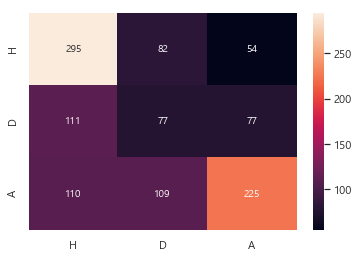

In [17]:
print(model_name[0], '\n')
prediction(models[0], X_train, Y_train, X_test, Y_test)

Logistic Regression 

Training accuracy: 0.46477
Test accuracy: 0.46842
Cross-validation mean score : 0.51316
Cross-validation scores : [0.52631579 0.44736842 0.5        0.5        0.55263158 0.57894737
 0.47368421 0.55263158 0.5        0.5       ]
             precision    recall  f1-score   support

          0       0.50      0.63      0.56       142
          1       0.30      0.24      0.27       108
          2       0.54      0.48      0.51       130

avg / total       0.46      0.47      0.46       380
 



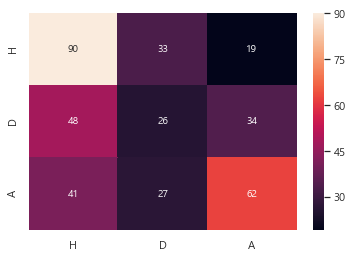

In [20]:
print(model_name[0], '\n')
prediction(models[0], X_train, Y_train, X_test_LALIGA, Y_test_LALIGA)

Logistic Regression 

Training accuracy: 0.46477
Test accuracy: 0.54474
Cross-validation mean score : 0.51842
Cross-validation scores : [0.63157895 0.5        0.57894737 0.44736842 0.5        0.52631579
 0.5        0.39473684 0.60526316 0.5       ]
             precision    recall  f1-score   support

          0       0.60      0.71      0.65       145
          1       0.31      0.40      0.35        77
          2       0.68      0.46      0.55       158

avg / total       0.57      0.54      0.55       380
 



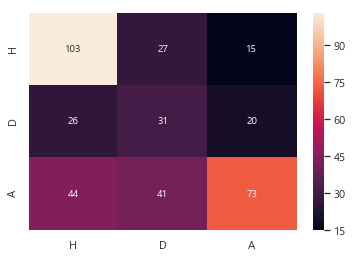

In [21]:
print(model_name[0], '\n')
prediction(models[0], X_train, Y_train, X_test_EPL, Y_test_EPL)

Logistic Regression 

Training accuracy: 0.46477
Test accuracy: 0.55789
Cross-validation mean score : 0.55789
Cross-validation scores : [0.57894737 0.60526316 0.52631579 0.52631579 0.65789474 0.47368421
 0.52631579 0.5        0.52631579 0.65789474]
             precision    recall  f1-score   support

          0       0.62      0.71      0.66       144
          1       0.24      0.25      0.25        80
          2       0.68      0.58      0.62       156

avg / total       0.56      0.56      0.56       380
 



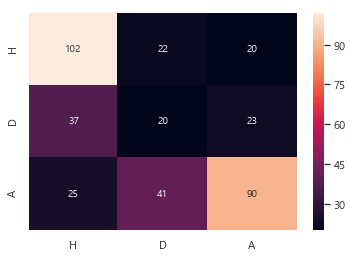

In [22]:
print(model_name[0], '\n')
prediction(models[0], X_train, Y_train, X_test_SERIE, Y_test_SERIE)

Logistic Regression 

Training accuracy: 0.46477
Test accuracy: 0.46078
Cross-validation mean score : 0.46452
Cross-validation scores : [0.5483871  0.41935484 0.41935484 0.48387097 0.32258065 0.4516129
 0.5        0.56666667 0.53333333 0.4       ]
             precision    recall  f1-score   support

          0       0.50      0.62      0.55       112
          1       0.24      0.27      0.26        73
          2       0.62      0.43      0.51       121

avg / total       0.48      0.46      0.46       306
 



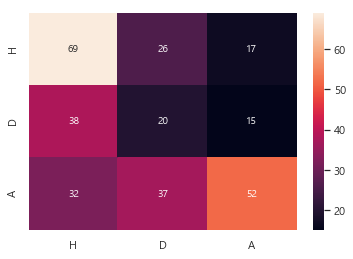

In [23]:
print(model_name[0], '\n')
prediction(models[0], X_train, Y_train, X_test_BUNDES, Y_test_BUNDES)

K-Neighbors Classifier 

Training accuracy: 0.51387
Test accuracy: 0.49474
Cross-validation mean score : 0.54561
Cross-validation scores : [0.49122807 0.57894737 0.57894737 0.53508772 0.57017544 0.52631579
 0.57894737 0.57894737 0.5        0.51754386]
             precision    recall  f1-score   support

          0       0.52      0.68      0.59       390
          1       0.35      0.29      0.32       322
          2       0.58      0.48      0.52       428

avg / total       0.49      0.49      0.49      1140
 



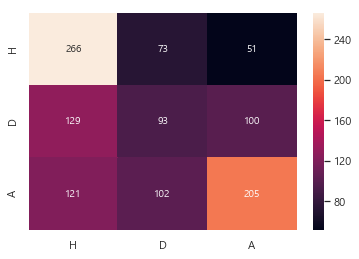

In [24]:
print(model_name[1], '\n')
prediction(models[1], X_train, Y_train, X_test, Y_test)

K-Neighbors Classifier 

Training accuracy: 0.51387
Test accuracy: 0.44737
Cross-validation mean score : 0.53158
Cross-validation scores : [0.63157895 0.5        0.5        0.68421053 0.63157895 0.47368421
 0.52631579 0.5        0.44736842 0.42105263]
             precision    recall  f1-score   support

          0       0.46      0.65      0.54       127
          1       0.35      0.24      0.29       123
          2       0.50      0.45      0.47       130

avg / total       0.44      0.45      0.43       380
 



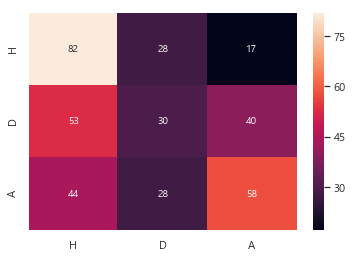

In [25]:
print(model_name[1], '\n')
prediction(models[1], X_train, Y_train, X_test_LALIGA, Y_test_LALIGA)

K-Neighbors Classifier 

Training accuracy: 0.51387
Test accuracy: 0.49474
Cross-validation mean score : 0.52105
Cross-validation scores : [0.57894737 0.42105263 0.55263158 0.42105263 0.5        0.55263158
 0.55263158 0.55263158 0.60526316 0.47368421]
             precision    recall  f1-score   support

          0       0.50      0.70      0.58       125
          1       0.41      0.35      0.38       116
          2       0.56      0.43      0.49       139

avg / total       0.50      0.49      0.49       380
 



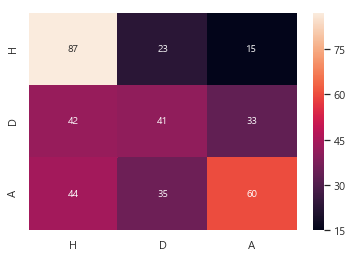

In [26]:
print(model_name[1], '\n')
prediction(models[1], X_train, Y_train, X_test_EPL, Y_test_EPL)

K-Neighbors Classifier 

Training accuracy: 0.51387
Test accuracy: 0.54211
Cross-validation mean score : 0.54211
Cross-validation scores : [0.60526316 0.63157895 0.5        0.44736842 0.71052632 0.44736842
 0.47368421 0.55263158 0.55263158 0.5       ]
             precision    recall  f1-score   support

          0       0.59      0.70      0.64       138
          1       0.27      0.27      0.27        83
          2       0.65      0.55      0.60       159

avg / total       0.55      0.54      0.54       380
 



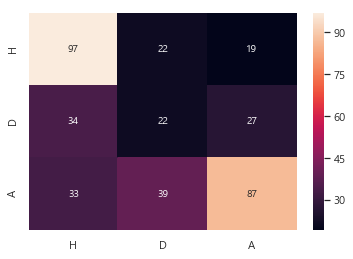

In [27]:
print(model_name[1], '\n')
prediction(models[1], X_train, Y_train, X_test_SERIE, Y_test_SERIE)

K-Neighbors Classifier 

Training accuracy: 0.51387
Test accuracy: 0.44118
Cross-validation mean score : 0.47409
Cross-validation scores : [0.67741935 0.38709677 0.51612903 0.48387097 0.32258065 0.38709677
 0.5        0.56666667 0.5        0.4       ]
             precision    recall  f1-score   support

          0       0.42      0.60      0.49        97
          1       0.42      0.33      0.37       106
          2       0.50      0.41      0.45       103

avg / total       0.45      0.44      0.44       306
 



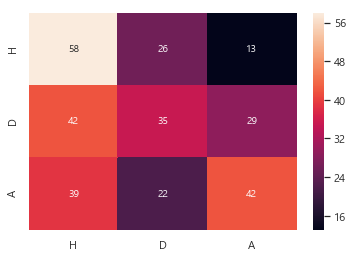

In [28]:
print(model_name[1], '\n')
prediction(models[1], X_train, Y_train, X_test_BUNDES, Y_test_BUNDES)

Linear SVC 

Training accuracy: 0.45987
Test accuracy: 0.54211
Cross-validation mean score : 0.54474
Cross-validation scores : [0.52631579 0.56140351 0.5877193  0.57894737 0.55263158 0.52631579
 0.57017544 0.57894737 0.48245614 0.48245614]
             precision    recall  f1-score   support

          0       0.65      0.66      0.66       506
          1       0.24      0.31      0.27       210
          2       0.61      0.51      0.56       424

avg / total       0.56      0.54      0.55      1140
 



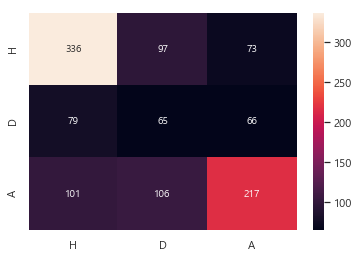

In [29]:
print(model_name[2], '\n')
prediction(models[2], X_train, Y_train, X_test, Y_test)

Linear SVC 

Training accuracy: 0.46378
Test accuracy: 0.48421
Cross-validation mean score : 0.52105
Cross-validation scores : [0.55263158 0.44736842 0.52631579 0.55263158 0.55263158 0.55263158
 0.5        0.55263158 0.5        0.47368421]
             precision    recall  f1-score   support

          0       0.47      0.66      0.55       128
          1       0.30      0.25      0.27       104
          2       0.64      0.50      0.56       148

avg / total       0.49      0.48      0.48       380
 



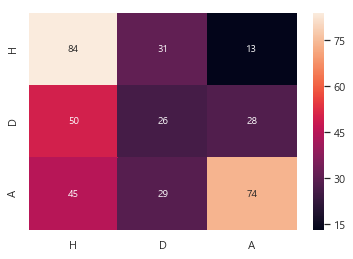

In [30]:
print(model_name[2], '\n')
prediction(models[2], X_train, Y_train, X_test_LALIGA, Y_test_LALIGA)

Linear SVC 

Training accuracy: 0.45831
Test accuracy: 0.53421
Cross-validation mean score : 0.48947
Cross-validation scores : [0.60526316 0.5        0.5        0.44736842 0.5        0.44736842
 0.44736842 0.36842105 0.57894737 0.5       ]
             precision    recall  f1-score   support

          0       0.62      0.68      0.65       158
          1       0.22      0.42      0.29        53
          2       0.68      0.43      0.53       169

avg / total       0.59      0.53      0.55       380
 



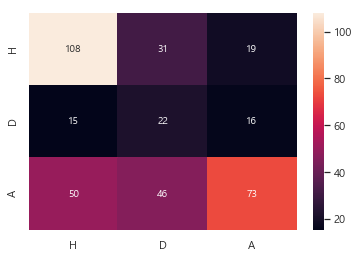

In [31]:
print(model_name[2], '\n')
prediction(models[2], X_train, Y_train, X_test_EPL, Y_test_EPL)

Linear SVC 

Training accuracy: 0.45469
Test accuracy: 0.54211
Cross-validation mean score : 0.54737
Cross-validation scores : [0.57894737 0.55263158 0.52631579 0.5        0.63157895 0.5
 0.47368421 0.52631579 0.52631579 0.65789474]
             precision    recall  f1-score   support

          0       0.55      0.74      0.63       123
          1       0.18      0.23      0.20        65
          2       0.75      0.52      0.62       192

avg / total       0.59      0.54      0.55       380
 



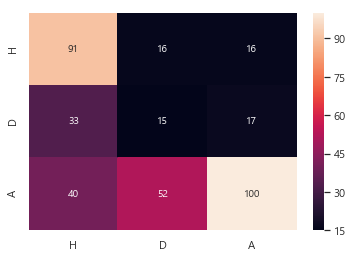

In [32]:
print(model_name[2], '\n')
prediction(models[2], X_train, Y_train, X_test_SERIE, Y_test_SERIE)

Linear SVC 

Training accuracy: 0.46683
Test accuracy: 0.42484
Cross-validation mean score : 0.45806
Cross-validation scores : [0.48387097 0.38709677 0.38709677 0.51612903 0.32258065 0.48387097
 0.5        0.6        0.53333333 0.36666667]
             precision    recall  f1-score   support

          0       0.33      0.65      0.44        71
          1       0.39      0.29      0.33       110
          2       0.62      0.42      0.50       125

avg / total       0.47      0.42      0.42       306
 



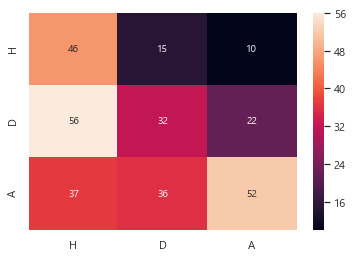

In [33]:
print(model_name[2], '\n')
prediction(models[2], X_train, Y_train, X_test_BUNDES, Y_test_BUNDES)

Random Forest Classifier 

Training accuracy: 0.99078
Test accuracy: 0.51228
Cross-validation mean score : 0.52018
Cross-validation scores : [0.50877193 0.45614035 0.53508772 0.56140351 0.51754386 0.50877193
 0.56140351 0.57017544 0.51754386 0.46491228]
             precision    recall  f1-score   support

          0       0.66      0.62      0.64       551
          1       0.27      0.27      0.27       263
          2       0.48      0.53      0.50       326

avg / total       0.52      0.51      0.51      1140
 



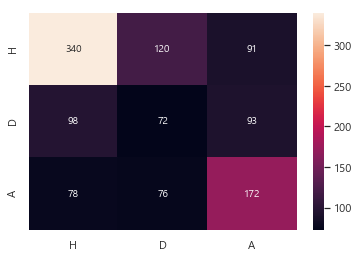

In [34]:
print(model_name[3], '\n')
prediction(models[3], X_train, Y_train, X_test, Y_test)

Random Forest Classifier 

Training accuracy: 0.99063
Test accuracy: 0.48421
Cross-validation mean score : 0.46842
Cross-validation scores : [0.39473684 0.44736842 0.5        0.65789474 0.60526316 0.44736842
 0.28947368 0.44736842 0.5        0.39473684]
             precision    recall  f1-score   support

          0       0.64      0.59      0.62       194
          1       0.30      0.27      0.29        95
          2       0.37      0.47      0.42        91

avg / total       0.49      0.48      0.49       380
 



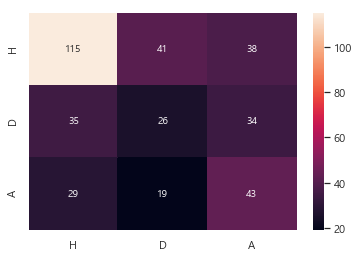

In [35]:
print(model_name[3], '\n')
prediction(models[3], X_train, Y_train, X_test_LALIGA, Y_test_LALIGA)

Random Forest Classifier 

Training accuracy: 0.98985
Test accuracy: 0.47632
Cross-validation mean score : 0.47368
Cross-validation scores : [0.60526316 0.39473684 0.55263158 0.34210526 0.47368421 0.36842105
 0.55263158 0.52631579 0.5        0.42105263]
             precision    recall  f1-score   support

          0       0.54      0.59      0.56       160
          1       0.32      0.31      0.32       102
          2       0.51      0.47      0.49       118

avg / total       0.47      0.48      0.47       380
 



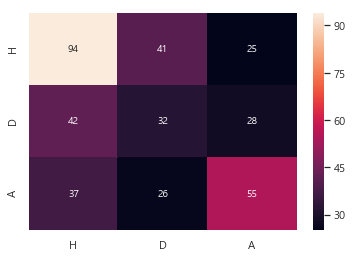

In [36]:
print(model_name[3], '\n')
prediction(models[3], X_train, Y_train, X_test_EPL, Y_test_EPL)

Random Forest Classifier 

Training accuracy: 0.98978
Test accuracy: 0.53947
Cross-validation mean score : 0.55000
Cross-validation scores : [0.60526316 0.55263158 0.5        0.5        0.73684211 0.5
 0.47368421 0.52631579 0.5        0.60526316]
             precision    recall  f1-score   support

          0       0.72      0.65      0.68       181
          1       0.33      0.29      0.31        92
          2       0.45      0.56      0.50       107

avg / total       0.55      0.54      0.54       380
 



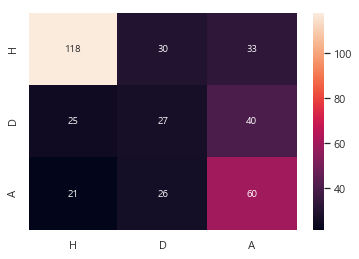

In [37]:
print(model_name[3], '\n')
prediction(models[3], X_train, Y_train, X_test_SERIE, Y_test_SERIE)

Random Forest Classifier 

Training accuracy: 0.98929
Test accuracy: 0.43791
Cross-validation mean score : 0.42839
Cross-validation scores : [0.48387097 0.32258065 0.4516129  0.51612903 0.29032258 0.41935484
 0.5        0.46666667 0.36666667 0.46666667]
             precision    recall  f1-score   support

          0       0.53      0.53      0.53       138
          1       0.31      0.32      0.32        82
          2       0.42      0.41      0.41        86

avg / total       0.44      0.44      0.44       306
 



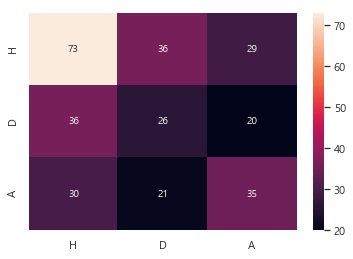

In [38]:
print(model_name[3], '\n')
prediction(models[3], X_train, Y_train, X_test_BUNDES, Y_test_BUNDES)

Multi nomial Naive Bayes 

Training accuracy: 0.44469
Test accuracy: 0.50088
Cross-validation mean score : 0.52982
Cross-validation scores : [0.52631579 0.52631579 0.51754386 0.53508772 0.57017544 0.44736842
 0.53508772 0.60526316 0.50877193 0.52631579]
             precision    recall  f1-score   support

          0       0.53      0.66      0.59       410
          1       0.32      0.27      0.29       320
          2       0.60      0.52      0.56       410

avg / total       0.50      0.50      0.49      1140
 



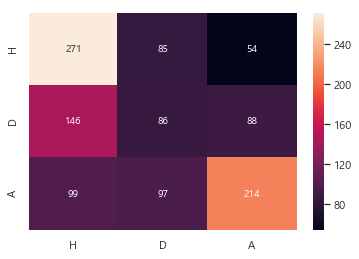

In [39]:
print(model_name[4], '\n')
prediction(models[4], X_train, Y_train, X_test, Y_test)

Multi nomial Naive Bayes 

Training accuracy: 0.44469
Test accuracy: 0.46316
Cross-validation mean score : 0.51053
Cross-validation scores : [0.52631579 0.5        0.44736842 0.44736842 0.60526316 0.55263158
 0.5        0.63157895 0.42105263 0.47368421]
             precision    recall  f1-score   support

          0       0.47      0.64      0.55       132
          1       0.30      0.21      0.25       122
          2       0.57      0.52      0.54       126

avg / total       0.45      0.46      0.45       380
 



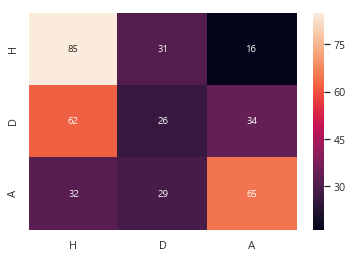

In [40]:
print(model_name[4], '\n')
prediction(models[4], X_train, Y_train, X_test_LALIGA, Y_test_LALIGA)

Multi nomial Naive Bayes 

Training accuracy: 0.44469
Test accuracy: 0.50000
Cross-validation mean score : 0.52632
Cross-validation scores : [0.52631579 0.47368421 0.63157895 0.39473684 0.63157895 0.47368421
 0.57894737 0.5        0.5        0.55263158]
             precision    recall  f1-score   support

          0       0.49      0.70      0.57       120
          1       0.42      0.33      0.37       126
          2       0.59      0.48      0.53       134

avg / total       0.50      0.50      0.49       380
 



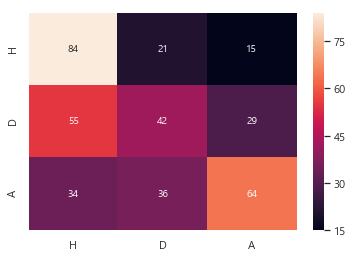

In [86]:
print(model_name[4], '\n')
prediction(models[4], X_train, Y_train, X_test_EPL, Y_test_EPL)

Multi nomial Naive Bayes 

Training accuracy: 0.44469
Test accuracy: 0.53947
Cross-validation mean score : 0.57105
Cross-validation scores : [0.55263158 0.60526316 0.52631579 0.57894737 0.63157895 0.52631579
 0.60526316 0.60526316 0.5        0.57894737]
             precision    recall  f1-score   support

          0       0.62      0.65      0.63       158
          1       0.22      0.25      0.23        72
          2       0.64      0.57      0.60       150

avg / total       0.55      0.54      0.54       380
 



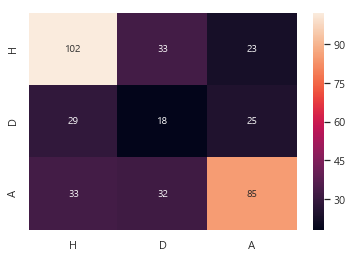

In [42]:
print(model_name[4], '\n')
prediction(models[4], X_train, Y_train, X_test_SERIE, Y_test_SERIE)

Multi nomial Naive Bayes 

Training accuracy: 0.44469
Test accuracy: 0.43137
Cross-validation mean score : 0.46473
Cross-validation scores : [0.48387097 0.41935484 0.48387097 0.4516129  0.32258065 0.41935484
 0.6        0.63333333 0.46666667 0.36666667]
             precision    recall  f1-score   support

          0       0.37      0.57      0.45        90
          1       0.45      0.32      0.37       116
          2       0.52      0.44      0.48       100

avg / total       0.45      0.43      0.43       306
 



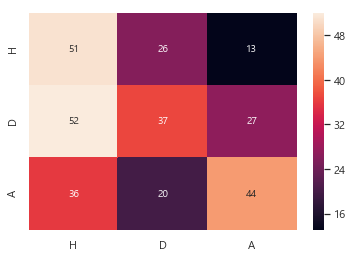

In [43]:
print(model_name[4], '\n')
prediction(models[4], X_train, Y_train, X_test_BUNDES, Y_test_BUNDES)

XGB Classifier 



C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

Training accuracy: 0.51714


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test accuracy: 0.53333
Cross-validation mean score : 0.55965
Cross-validation scores : [0.56140351 0.57894737 0.56140351 0.56140351 0.56140351 0.57017544
 0.57894737 0.5877193  0.51754386 0.51754386]


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.64      0.66      0.65       501
          1       0.07      0.26      0.11        69
          2       0.73      0.46      0.56       570

avg / total       0.65      0.53      0.57      1140
 



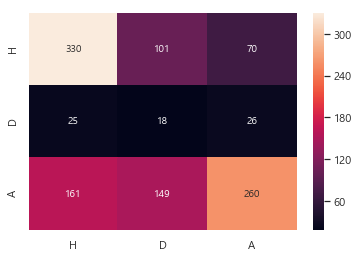

In [44]:
print(model_name[5], '\n')
prediction(models[5], X_train, Y_train, X_test, Y_test)

XGB Classifier 



C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

Training accuracy: 0.51714


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test accuracy: 0.50789
Cross-validation mean score : 0.51316
Cross-validation scores : [0.60526316 0.52631579 0.39473684 0.68421053 0.5        0.44736842
 0.52631579 0.55263158 0.44736842 0.44736842]


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.63      0.62      0.62       180
          1       0.05      0.14      0.07        28
          2       0.67      0.45      0.54       172

avg / total       0.60      0.51      0.54       380
 



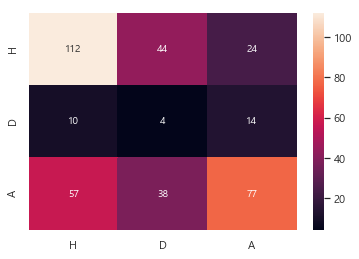

In [45]:
print(model_name[5], '\n')
prediction(models[5], X_train, Y_train, X_test_LALIGA, Y_test_LALIGA)

XGB Classifier 



C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

Training accuracy: 0.51714


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test accuracy: 0.49211
Cross-validation mean score : 0.52368
Cross-validation scores : [0.60526316 0.44736842 0.47368421 0.47368421 0.68421053 0.5
 0.57894737 0.47368421 0.55263158 0.44736842]


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.58      0.66      0.62       151
          1       0.08      0.33      0.13        24
          2       0.73      0.39      0.50       205

avg / total       0.63      0.49      0.53       380
 



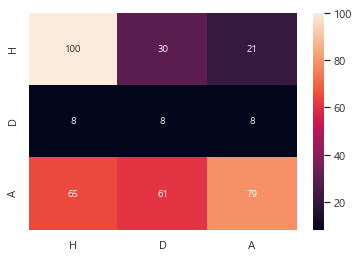

In [46]:
print(model_name[5], '\n')
prediction(models[5], X_train, Y_train, X_test_EPL, Y_test_EPL)

XGB Classifier 



C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

Training accuracy: 0.51714


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test accuracy: 0.60000
Cross-validation mean score : 0.60789
Cross-validation scores : [0.60526316 0.65789474 0.5        0.52631579 0.71052632 0.52631579
 0.55263158 0.65789474 0.63157895 0.71052632]


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.72      0.69      0.71       170
          1       0.07      0.35      0.12        17
          2       0.78      0.54      0.64       193

avg / total       0.72      0.60      0.65       380
 



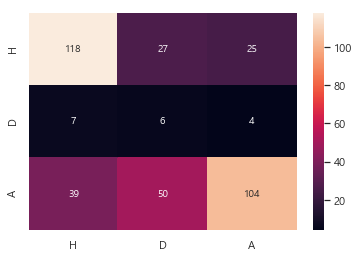

In [47]:
print(model_name[5], '\n')
prediction(models[5], X_train, Y_train, X_test_SERIE, Y_test_SERIE)

XGB Classifier 



C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

Training accuracy: 0.51714


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test accuracy: 0.45098
Cross-validation mean score : 0.45473
Cross-validation scores : [0.58064516 0.35483871 0.4516129  0.41935484 0.32258065 0.4516129
 0.46666667 0.6        0.43333333 0.46666667]


C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.54      0.60      0.57       126
          1       0.06      0.16      0.09        31
          2       0.69      0.39      0.50       149

avg / total       0.56      0.45      0.48       306
 



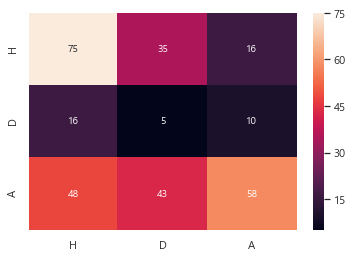

In [48]:
print(model_name[5], '\n')
prediction(models[5], X_train, Y_train, X_test_BUNDES, Y_test_BUNDES)

In [115]:
def getaccu(row):
    if(row['Result'] == row['Predict']):
        return 'O'
    else:
        return 'X'

In [116]:
predict_proba = xgb.predict_proba(X_test)
total_proba = xgb.predict(X_test)

predictiondata = data[['League', 'Season', 'Match_Date', 'Home_Name', 'Away_Name', 'Result']][data['Season'] == 1718].reset_index(drop=True)
predictiondata['Predict'] = total_proba
Match_ = predictiondata.apply(lambda row: getaccu(row), axis=1)
predictiondata['Match?'] = Match_
predictiondata.tail()

C:\Users\dlfdus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,League,Season,Match_Date,Home_Name,Away_Name,Result,Predict,Match?
1135,SERIE,1718,180520,Udinese,Bologna,0,0,O
1136,SERIE,1718,180520,Napoli,Crotone,0,0,O
1137,SERIE,1718,180520,AC Milan,Fiorentina,0,0,O
1138,SERIE,1718,180520,Lazio,Inter,2,2,O
1139,SERIE,1718,180520,Sassuolo,Roma,2,2,O


In [117]:
predictiondata.to_csv('data/prediction.csv')

In [118]:
OX = Counter(predictiondata['Match?'])['O']
print('Accuracy : {}'.format(OX/predictiondata.shape[0]))

Accuracy : 0.5228070175438596
